In [1]:
import pandas as pd
xls = pd.ExcelFile("xwml.xls",parse_dates = True)
info_df = xls.parse(0)
info_df.columns = ['id','title','time','source','foundation']
info_df['year'] = list(map(lambda x:x.year,info_df['time']))

In [2]:
info_df.head()

,id,title,time,source,foundation,year
0,403834619533,致中山大学受助毕业学子的公开信,2010-06-12,广东省中山大学教育发展基金会,广东省中山大学教育发展基金会,2010
1,348015367040,两笔紧急援助金发放,2010-06-21,广东省中山大学教育发展基金会,广东省中山大学教育发展基金会,2010
2,610435567915,广东省中山大学校学生处、教育发展基金会代表拜访奖助学金捐赠单位,2010-06-21,广东省中山大学教育发展基金会,广东省中山大学教育发展基金会,2010
3,943575066142,我会成为首批通过民政部2009年年度检查的基金会之一,2010-05-04,中国古生物化石保护基金会,中国农业大学教育基金会,2010
4,370101904748,南都公益基金会通过2009年年度检查,2010-05-07,南都公益基金会,中国农业大学教育基金会,2010


In [11]:
len(info_df.foundation.unique())

479

In [77]:
len(info_df.source.unique())

2493

In [55]:
len(info_df.id.unique())

41207

In [31]:
pd.DataFrame(info_df.groupby('foundation')['year'].count().sort_values(ascending = False)[:10]).index

Index([u'中国扶贫基金会', u'中国青少年发展基金会', u'中国妇女发展基金会', u'中华少年儿童慈善救助基金会', u'中国红十字基金会',
       u'中国光华科技基金会', u'中国儿童少年基金会', u'中国宋庆龄基金会', u'爱德基金会', u'南都公益基金会'],
      dtype='object', name=u'foundation')

In [48]:
found = pd.DataFrame(info_df.groupby('foundation')['year'].count().sort_values(ascending = False)[:10]).index
cnt = pd.DataFrame(info_df.groupby('foundation')['year'].count().sort_values(ascending = False)[:10])['year']
for i,v in zip(found,cnt):
    print i.encode('utf-8')

中国扶贫基金会
中国青少年发展基金会
中国妇女发展基金会
中华少年儿童慈善救助基金会
中国红十字基金会
中国光华科技基金会
中国儿童少年基金会
中国宋庆龄基金会
爱德基金会
南都公益基金会


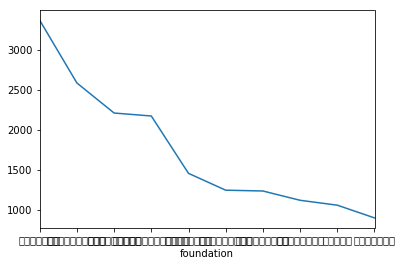

In [53]:
info_df.groupby('foundation')['year'].count().sort_values(ascending = False)[:10].plot()

In [21]:
list(map(lambda x:x.decode('latin1'),info_df['foundation'].unique()))

UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-13: ordinal not in range(128)

In [ ]:
#import plotly.plotly as py
#from plotly.graph_objs import *
from ipywidgets import StaticInteract, RangeWidget, RadioWidget, DropDownWidget
%matplotlib inline
import matplotlib.pyplot as plt

year_list = sorted(info_df['year'].unique())
found_list = [i.encode('utf8') for i in sorted(info_df['foundation'].unique())]
def fig1(year,found):
    sliced_data = info_df[info_df['year'] == int(year)]
    sliced_data = sliced_data[sliced_data['foundation'] == found]
    return len(sliced_data)

    ##print('%s年 基金会新闻数目排名：'%year)
    #return df.index
    
StaticInteract(fig1,year=DropDownWidget(year_list),found =DropDownWidget(found_list) )    

In [23]:
def operation(a, b, op, fruit):
    if op == "multiply":
        return "{0} * {1} = {2} {3}".format(a, b, a * b, fruit)
    elif op == "add":
        return "{0} + {1} = {2} {3}".format(a, b, a + b, fruit)
    else:
        raise ValueError

StaticInteract(operation,
               a=RangeWidget(0, 10),
               b=RangeWidget(0, 10),
               op=RadioWidget(["multiply", "add"]),
               fruit=DropDownWidget(['apples','bananas','pears','kiwis'])
               )

In [22]:
interact(fig1,year = widgets.Dropdown(
    options=sorted(info_df['year'].unique()),
    description='year:',
    value = 2017,
    disabled=False))

2017年 基金会新闻数目排名：


,新闻数目
foundation,
中国扶贫基金会,2256
中国妇女发展基金会,1308
中国青少年发展基金会,1142
中华少年儿童慈善救助基金会,913
中国儿童少年基金会,701
中国红十字基金会,628
腾讯公益慈善基金会,415
中国华侨公益基金会,408
中国社会福利基金会,320


<function __main__.fig1>

<function __main__.fig2>

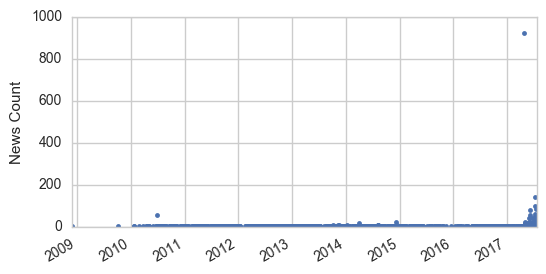

In [5]:
list_found = info_df['foundation'].unique()
def fig2(found):
    sliced_data = info_df[info_df['foundation'] == found]
    sliced_data.groupby('time')['year'].count().plot(style = '.',figsize = (6,3))
    plt.ylabel('News Count')
    plt.xlabel('')
interact(fig2,found = widgets.Dropdown(
    options=sorted(list(list_found)),
    description='基金会：',
    value = '中国扶贫基金会',
    disabled=False))

In [7]:
import ipywidgets
from ipywidgets.embed import embed_snippet

s1, s2 = interact(fig2,found = widgets.Dropdown(
    options=sorted(list(list_found)),
    description='基金会：',
    value = '中国扶贫基金会',
    disabled=False))
print(embed_snippet(views=[s1, s2]))

ImportError: No module named 'ipywidgets.embed'

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

In [109]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import TextInput,Dropdown
def my_text_input_handler(attr, old, new):
    print("Previous label: " + old)
    print("Updated label: " + new)

text_input = TextInput(value="default", title="Label:")
text_input.on_change("value", my_text_input_handler)
show(text_input)

In [118]:
def fig2(attr,old,new):
    sliced_data = info_df[info_df['foundation'] == new]
    sliced_data.groupby('time')['year'].count().plot(style = '.',figsize = (6,3))
    plt.ylabel('News Count')
    plt.xlabel('')
    
found_select = TextInput(value = '上海交通大学教育发展基金会')
found_select.on_change("value",fig2)
show(found_select)

In [175]:
graph = GraphWidget(url)

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
@interact
def greeting(text="World"):
    print("Hello {}".format(text))

Hello World


In [61]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 1.0)

In [46]:
interact(f, x=['apples','oranges'])

'oranges'

In [54]:

from ipywidgets import FloatSlider
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

4.6 5.0


In [52]:
interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

NameError: name 'slow_function' is not defined

In [13]:
import plotly 
plotly.tools.set_credentials_file(username = 'MiyainNYC',api_key = 's9kLGoUPY3uFo5fRMcxe')

In [22]:
import pandas as pd
import plotly.plotly as py

from plotly.graph_objs import *

# we will define a function that will handle the input from the dropdown widget
data = [Bar(x=info_df.groupby('foundation')['year'].count().sort_values(ascending = False).index,
               y=info_df.groupby('foundation')['year'].count().sort_values(ascending = False).values)]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [4]:
import plotly

In [178]:
w.value

2013

In [152]:
df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1) 

In [153]:
month = widgets.FloatSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update = False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month] )

textbox = widgets.Text(
    description='Airline:   ',
    value='Delta',
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


### Assign an emptry graph widget with two traces

g = GraphWidget('https://plot.ly/~miya/1192/')

In [154]:
def validate():
    # print "validating"
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False

def response(change):
    if validate():
        # print "using date"
        if use_date.value:
            filter_list = [i and j and k for i,j,k in 
                           zip(df['month'] == month.value, df['carrier'] == textbox.value, 
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]
            x1 = temp_df['arr_delay']
            x2 = temp_df['dep_delay']
            g.restyle({'x': [x1], 'name': 'Arrival Delays', 'type': 'histogram', 
                       'opacity': 0.75}, indices=0) 
            g.restyle({'x': [x2], 'name': 'Departure Delays', 'type': 'histogram', 
                       'opacity': 0.75}, indices=1)
            g.relayout({'barmode': 'overlay', 'xaxis': {'title': 'Delay in Minutes'},
                        'yaxis': {'title': 'Number of Delays'}})
            # print temp_df.head()
            
        else:
            # print "not using date"
            filter_list = [i and j for i,j in 
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
            x1 = temp_df['arr_delay']
            x2 = temp_df['dep_delay']
            g.restyle({'x': [x1], 'name': 'Arrival Delays', 'type': 'histogram', 
                       'opacity': 0.75}, indices=0) 
            g.restyle({'x': [x2], 'name': 'Departure Delays', 'type': 'histogram', 
                       'opacity': 0.75}, indices=1)
            g.relayout({'barmode': 'overlay'})
            # print temp_df.head()
    

origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [155]:
display(container)
container2 = widgets.HBox([origin, textbox])
display(container2)
display(g)

In [145]:
graph.observe

<bound method HasTraits.observe of <plotly.widgets.graph_widget.GraphWidget object at 0x00000079FA9F1080>>

In [90]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

NameError: name 'web' is not defined

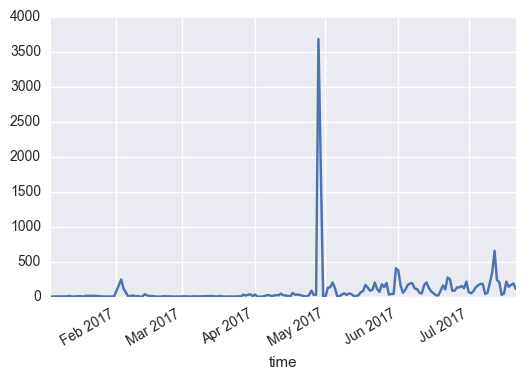

In [81]:
info_df[info_df['time']>'2017-01-01'].groupby('time').count()['id'].plot()

In [88]:
info_df[info_df['time']>'2017-01-01'].groupby('foundation').count()['id'].sort_values(ascending = False)

foundation
中国扶贫基金会             2256
中国妇女发展基金会           1308
中国青少年发展基金会          1142
中华少年儿童慈善救助基金会        913
中国儿童少年基金会            701
中国红十字基金会             628
腾讯公益慈善基金会            415
中国华侨公益基金会            408
中国社会福利基金会            320
中国绿化基金会              316
中国教育发展基金会            293
中国健康促进基金会            278
中华思源工程扶贫基金会          277
南都公益基金会              270
中国宋庆龄基金会             224
爱佑慈善基金会              216
上海宋庆龄基金会             187
中国残疾人福利基金会           186
中华环境保护基金会            175
中华社会救助基金会            172
中国少年儿童文化艺术基金会        147
爱德基金会                127
中国光华科技基金会            121
清华大学教育基金会            117
江苏省儿童少年福利基金会         113
友成企业家扶贫基金会           106
中国听力医学发展基金会          101
万科公益基金会               98
华民慈善基金会               84
北京青少年发展基金会            78
                    ... 
杭州市关爱孤儿基金会             1
云南华商公益基金会              1
内蒙古光彩事业基金会             1
永恒慈善基金会                1
北京万通公益基金会              1
北京中国国家博物馆事业发展基金会       1
江苏宏德文化出版基金会            1
北京中国青年政治学院教育基金会        1
北京中央民族大学教育基金会 

fcode = []
fcont = []
for f in txtfile:
    with open(f, encoding='utf8') as infile:
        html = BeautifulSoup(infile, "html.parser")
        fcont.append(html.text.strip())
        fcode.append(f)

In [ ]:
def read_file(txtfile):
    for f in txtfile:
        with open(f, encoding='utf8') as infile:
            html = BeautifulSoup(infile, "html.parser")
            fcont.append(html.text.strip())
            fcode.append(f)
    return 

In [11]:
html.text.strip()

'9月27日上午，北京交通大学教育基金会一行来我校调研，双方就校庆捐赠、基金会筹资方式、基金会评估及具体业务处理等方面的问题进行座谈。\n\xa0\xa0\xa0 北京交通大学教育基金会副秘书长徐劲松，对外联络合作处基金工作部部长毕斐代表交大教育基金会进行交流，我校财务处处长、教育基金会秘书长应惟伟，校友办副主任、教育基金会副秘书长顾家赟以及财务处和基金会的相关工作人员参加了座谈会。\n\xa0\xa0\xa0 双方介绍了本校基金会的基本架构及接受捐赠情况，而后就各自关心的问题展开了深入的探讨。针对交大基金会关心的校庆捐赠的前期宣传、筹备及现场捐赠方面的问题，应惟伟处长对我校校庆捐赠的组织筹备情况作详细的介绍，并提出了“项目营销”的筹资新理念。我校也就基金会评估以及一些具体的业务处理问题与交大基金会进行了深入交流。'